In [29]:
# memo
# https://docs.abci.ai/ja/tips/jupyter-notebook/
# pip install keras==2.24
# pip install scikit-learn
# pip install funcy
# pip install pandas
# pip install matplotlib
# pip install pyarrow
# pip install faiss-gpu


## Learn 1024 class 5mer type to for general NN weight

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 320, 2)       0                                            
__________________________________________________________________________________________________
gaussian_noise_3 (GaussianNoise (None, 320, 2)       0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_51 (Conv1D)              (None, 160, 32)      224         gaussian_noise_3[0][0]           
__________________________________________________________________________________________________
batch_normalization_27 (BatchNo (None, 160, 32)      128         conv1d_51[0][0]                  
__________________________________________________________________________________________________
dropout_11

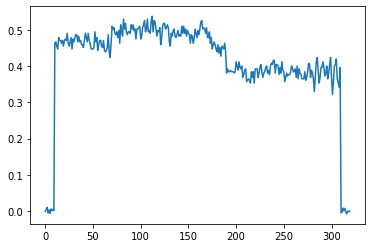

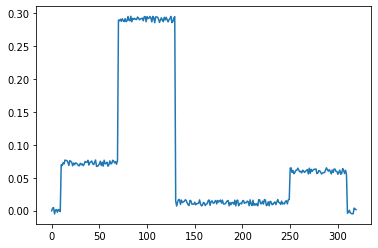

12000 11999 labelidx                                                       10
signal          [0.010065408, -0.0100321965, 0.0027956527, 0.0...
originalsize                                 [159, 6, 23, 35, 13]
Name: 11999, dtype: object
24000 23999 labelidx                                                       20
signal          [-0.0034679081, -0.00802928, 0.000121801626, 0...
originalsize                                  [11, 6, 53, 29, 61]
Name: 23999, dtype: object
36000 35999 labelidx                                                       30
signal          [0.00058412633, 0.0054479237, 0.0087804645, -0...
originalsize                                  [26, 16, 6, 23, 18]
Name: 35999, dtype: object
48000 47999 labelidx                                                       40
signal          [0.0030449205, -0.0023233541, 0.011650459, -0....
originalsize                                 [48, 68, 14, 12, 29]
Name: 47999, dtype: object
60000 59999 labelidx                                

432000 431999 labelidx                                                      360
signal          [-0.0052376282, -0.008680961, -0.0049517644, -...
originalsize                                 [16, 18, 29, 43, 18]
Name: 431999, dtype: object
444000 443999 labelidx                                                      370
signal          [0.011045226, -0.003427787, 0.0016729285, -0.0...
originalsize                                    [6, 6, 8, 10, 79]
Name: 443999, dtype: object
456000 455999 labelidx                                                      380
signal          [-0.010408485, -0.0007945187, 0.0001927828, -0...
originalsize                                   [27, 6, 6, 18, 12]
Name: 455999, dtype: object
468000 467999 labelidx                                                      390
signal          [0.0015207193, -0.001211241, 0.008309964, 0.00...
originalsize                                  [30, 13, 48, 65, 6]
Name: 467999, dtype: object
480000 479999 labelidx                  

852000 851999 labelidx                                                      710
signal          [-0.002189739, 0.00801212, -0.008292177, -0.00...
originalsize                                    [2, 2, 24, 30, 6]
Name: 851999, dtype: object
864000 863999 labelidx                                                      720
signal          [0.0070869657, 0.00017616976, -0.0107004205, 0...
originalsize                                  [10, 6, 19, 74, 75]
Name: 863999, dtype: object
876000 875999 labelidx                                                      730
signal          [-0.0018598465, 0.008711733, 0.00794327, -0.00...
originalsize                                 [40, 12, 33, 12, 10]
Name: 875999, dtype: object
888000 887999 labelidx                                                      740
signal          [-0.011215514, 0.0031658644, -0.0022083898, 0....
originalsize                                  [28, 59, 17, 51, 6]
Name: 887999, dtype: object
900000 899999 labelidx                  

IndexError: index 1024 is out of bounds for axis 1 with size 1024

In [3]:
import glob
from sklearn.model_selection import train_test_split
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Activation, Flatten, Conv1D, Input, Dropout,BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Dropout, concatenate,\
    BatchNormalization, GaussianNoise, GlobalAveragePooling1D, Softmax
import random
from keras.layers import Reshape
from keras.layers import Multiply, multiply
import tensorflow as tf # add
import numpy as np

from funcy                     import concat, identity, juxt, partial, rcompose, repeat, take
from keras.callbacks           import LearningRateScheduler
from keras.layers              import Activation, Add, BatchNormalization, Concatenate, Conv1D, Dense, Dropout, GlobalAveragePooling1D, Input, MaxPooling1D
from keras.models              import Model, save_model
from keras.optimizers          import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers        import l2
from keras.utils               import plot_model
from operator                  import getitem
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Dropout, concatenate,\
    BatchNormalization, GaussianNoise, GlobalAveragePooling1D, Softmax

from keras.utils.training_utils import multi_gpu_model 
from keras import backend as K
from itertools import product
from keras.callbacks import ModelCheckpoint
import cnn_network
import ndoc_util


DATA_LENGTH_UNIT = 60
DATA_LENGTH = DATA_LENGTH_UNIT*5+20


def prepData(s_data):
    
    
    
    train_x = []
    test_x = []
    train_y = []
    test_y = []
    p_flg = 0
    flg = 0    
    totalcnt = 0
    df = pq.read_table(s_data).to_pandas()
    df1 = df[['labelidx','signal','originalsize']]

    
    for idx, row in df1.iterrows():

        flg =  row[0]
        signal = np.array(list(row[1]))
#         signal = ndoc_util.zeropadding10(signal)
        signal = np.array(signal)
#         signal = signal.astype('float32')/255. 
        
        originalsize = np.array(ndoc_util.extendAry(row[2]))
        originalsize = ndoc_util.zeropadding10(originalsize) 
        

        testidx = (idx%12 >= 10)
        if testidx:
            test_x.extend(signal)
            test_x.extend(originalsize)
            test_y.append(flg)
        else:
            train_x.extend(signal)
            train_x.extend(originalsize)
            train_y.append(flg)   
            
        if idx == 10:
            plt.plot(signal)
            plt.show()
            plt.plot(originalsize)
            plt.show()

        totalcnt = totalcnt+1  

        if totalcnt % 12000 == 0:
            print(totalcnt,idx,row)



    print("totalcnt",totalcnt)
    train_x = np.array(train_x)
    test_x = np.array(test_x)
    train_y = np.array(train_y)
    test_y = np.array(test_y)
    num_classes = np.unique(train_y).size
    print(type(train_x))
        
    print("train_x.shape",train_x.shape)
    print("test_x.shape",test_x.shape)


    print(num_classes, 'classes')

    print('y_train shape:',train_y.shape)
    print('y_test shape:', test_y.shape)
    
    train_x = np.reshape(train_x, (-1, DATA_LENGTH,2))
    test_x= np.reshape(test_x, (-1, DATA_LENGTH,2))
    train_y = np.reshape(train_y, (-1, 1, ))
    test_y = np.reshape(test_y, (-1, 1, ))

  
    train_y = keras.utils.to_categorical(train_y, num_classes)
    test_y = keras.utils.to_categorical(test_y, num_classes)
  
    print('train_x:', train_x.shape)
    print('train_y:', train_y.shape)   
    print('test_x shape:',test_x.shape)
    print('test_y shape:', test_y.shape)  

    return train_x,test_x,train_y,test_y,num_classes

def main(s_data,s_out):  
    
    
    
    #     with tf.device("/cpu:0"):
    epochs = 500
    batch_size = 1024
    num_classes = 1024
    gpu_count = 4    
    shape1=(None,  DATA_LENGTH,2)
    
    #with tf.device("/cpu:0"):
    model = cnn_network.build_network(shape=shape1, num_classes=num_classes)
    model.summary()
    model = multi_gpu_model(model, gpus=gpu_count) # add
        
        
    train_x,test_x,train_y,test_y,num_classes =  prepData(s_data)
    model.compile(loss='categorical_crossentropy',
                           optimizer= keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
                           #optimizer=opt,
                           metrics=['accuracy'])
    
    for ep in range(epochs):
        
        model.fit(train_x, train_y, epochs=1, batch_size=batch_size,verbose=1, 
                   shuffle=True, validation_data=(test_x, test_y))   
        outpath = s_out+str(ep)+".hdf"
        model.save_weights(outpath)   
#        score = model.evaluate(test_x, test_y, verbose=0)
#        print('epoch',ep,'Test loss:', score[0],'Test accuracy:', score[1])

#     checkpoint = ModelCheckpoint(s_out+"/best_all.hdf5", monitor='val_acc', verbose=1,
#     save_best_only=True, mode='auto', period=1)
        
#     fit = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,verbose=1, 
#                    shuffle=True, validation_data=(test_x, test_y),callbacks=[checkpoint])

#     score = model.evaluate(test_x, test_y, verbose=0)

    
    # ----------------------------------------------
    # Some plots
    # ----------------------------------------------
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

    # loss
    def plot_history_loss(fit):
        # Plot the loss in the history
        axL.plot(fit.history['loss'],label="loss for training")
        axL.plot(fit.history['val_loss'],label="loss for validation")
        axL.set_title('model loss')
        axL.set_xlabel('epoch')
        axL.set_ylabel('loss')
        axL.legend(loc='upper right')

    # acc
    def plot_history_acc(fit):
        # Plot the loss in the history
        axR.plot(fit.history['acc'],label="loss for training")
        axR.plot(fit.history['val_acc'],label="loss for validation")
        axR.set_title('model accuracy')
        axR.set_xlabel('epoch')
        axR.set_ylabel('accuracy')
        axR.legend(loc='upper right')

    plot_history_loss(fit)
    plot_history_acc(fit)
    fig.savefig('/groups2/gac50430/nanopore/dataset4DL/learnigcurve.png')
    plt.close()      
    
    
if __name__ == '__main__':    
    
    s_data ="/fs2/groups2/gac50430/nanopore/dataset4DL/1200each.pq"
#     s_data ="/fs2/groups2/gac50430/nanopore/dataset4DL/6000each.pq"
    s_out ="/fs2/groups2/gac50430/nanopore/dataset4DL/weight/"
    main(s_data,s_out)

## Convert multi GPU weight to single GPU weight

In [5]:
import cnn_network
import ndoc_util

DATA_LENGTH_UNIT = 60
DATA_LENGTH = DATA_LENGTH_UNIT*5+20
num_classes = 1024

gpu_count = 4    
shape1=(None,  DATA_LENGTH,2)
model = cnn_network.build_network(shape=shape1, num_classes=num_classes)

bst ="/fs2/groups2/gac50430/nanopore/dataset4DL/weight2/340.hdf"
save_path="/fs2/groups2/gac50430/nanopore/dataset4DL/bestweight.hdf"

p_model = multi_gpu_model(model,gpus=gpu_count)
p_model.load_weights(bst)  # load multi-gpu model weights
old_model = p_model.layers[-2]   #get single GPU model weights
old_model.save(save_path)

## Transfer learning with Deep One Class Classification (DOC) described in https://arxiv.org/abs/1801.05365

In [1]:
import glob
from sklearn.model_selection import train_test_split
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf # add
import numpy as np
import cnn_network
import ndoc_util
from keras.layers import GlobalAveragePooling1D,Dense
from keras.models import Model
from keras.engine.network import Network
from keras.optimizers import SGD
from keras import backend as K
import itertools
from keras.utils.training_utils import multi_gpu_model 
import keras


DATA_LENGTH_UNIT = 60
DATA_LENGTH = DATA_LENGTH_UNIT*5+20

def loadData(s,count):

    table = pq.read_table(s)
    df = table.to_pandas()
    df1 = df[['nucb4After','signal','originalsize']]

    data_x =[]
    cnt = 0
    for index, row in df1.iterrows():

        signal = np.array(list(row[1]))        
        signal = ndoc_util.zeropadding10(signal)
        data_x.append(signal) 

        originalsize = np.array(ndoc_util.extendAry(row[2]))
        originalsize = ndoc_util.zeropadding10(originalsize)
        data_x.append(originalsize)
        
        cnt = cnt+1
        if cnt%1000==0:
            print(cnt)
        if cnt == count:
            break        

    data_x = np.array(data_x)
    data_x = np.reshape(data_x, (count, DATA_LENGTH,2))  
    return data_x

def getNearExculudeSelf(nuc):
    
    first = nuc[0]
    last = nuc[4]
    nucs = ('A','T','C','G')
    gen = []
    for n1,n2,n3 in itertools.product(nucs, nucs, nucs):
        
        nc = first + n1+n2+n3+last
        if nc != nuc:
            gen.append(nc)
    

    return gen
    
def prepDataNear(s_data,nuc):
    
    
    
    train_x = []
    test_x = []
    train_y = []
    test_y = []
    p_flg = 0
    flg = 0    
    totalcnt = 0
    
    nucs = getNearExculudeSelf(nuc)
    paths = list(map(lambda x:s_data+"/"+x+".pq", nucs))
    
    samplecnt = 0
    for path in paths:
    
        table = pq.read_table(path)
        df = table.to_pandas()
#         print(df)
        df = df[['signal','originalsize']]
#         print(df)
        cnt = 0
        for idx, row in df.iterrows():

            flg =  samplecnt

            signal = np.array(list(row[0]))
            signal = ndoc_util.zeropadding10(signal)
            signal = np.array(signal)
            signal = signal.astype('float32')/255.  
            
            originalsize = np.array(ndoc_util.extendAry(row[1]))
            originalsize = ndoc_util.zeropadding10(originalsize)
            
#             if cnt ==0:
#                 print(path.replace(s_data+"/",""))
#                 fmer = path.replace(s_data+"/","").replace(".pq","")
#                 plt.title(fmer)
#                 plt.plot(signal)
#                 plt.show()
#                 plt.plot(originalsize)
#                 plt.show()

            testidx = (idx%12 >= 10)
            if testidx:
                test_x.append(signal)
                test_x.append(originalsize)
                test_y.append(flg)
            else:
                train_x.append(signal)
                train_x.append(originalsize)
                train_y.append(flg)   
            
            cnt = cnt+1
            totalcnt = totalcnt+1  
            
            if cnt % 12000 == 0:
                print(samplecnt,totalcnt,path,totalcnt,idx,row)
            if cnt == 12000:
                break

            
         
        samplecnt = samplecnt+1
    
#     print("totalcnt",totalcnt)
        
    train_x = np.array(train_x)
    test_x = np.array(test_x)
    train_y = np.array(train_y)
    test_y = np.array(test_y)
    num_classes = np.unique(train_y).size
        
#     print("train_x.shape",train_x.shape)
#     print("test_x.shape",train_x.shape)
#     print("train_y.shape",train_x.shape)
#     print("test_y.shape",train_x.shape)

#     print(num_classes, 'classes')

#     print('y_train shape:',train_y.shape)
#     print('y_test shape:', test_y.shape)
    
    train_x = np.reshape(train_x, (-1, DATA_LENGTH,2))
    test_x= np.reshape(test_x, (-1, DATA_LENGTH,2))
    train_y = np.reshape(train_y, (-1, 1, ))
    test_y = np.reshape(test_y, (-1, 1, ))

    test_y = test_y -1
    train_y = train_y-1
    train_y = keras.utils.to_categorical(train_y, num_classes)
    test_y = keras.utils.to_categorical(test_y, num_classes)
  
#     print('train_x:', train_x.shape)
#     print('train_y:', train_y.shape)   
#     print('test_x shape:',test_x.shape)
#     print('test_y shape:', test_y.shape)  

    return train_x,test_x,train_y,test_y,num_classes
    

def prepData(s_data,nuc):
    
    
    
    train_x = []
    test_x = []
    train_y = []
    test_y = []
    p_flg = 0
    flg = 0    
    totalcnt = 0
    path = s_data+"/"+nuc+".pq"

    

    
    table = pq.read_table(path)
    df = table.to_pandas()
    df = df[['signal','originalsize']]
    cnt = 0
    for idx, row in df.iterrows():


        signal = np.array(list(row[0]))
        signal = ndoc_util.zeropadding10(signal)
        signal = np.array(signal)
        signal = signal.astype('float32')/255.  

        originalsize = np.array(ndoc_util.extendAry(row[1]))
        originalsize = ndoc_util.zeropadding10(originalsize)

#         if cnt ==0:
#             print(path.replace(s_data+"/",""))
#             fmer = path.replace(s_data+"/","").replace(".pq","")
#             plt.title(fmer)
#             plt.plot(signal)
#             plt.show()
#             plt.plot(originalsize)
#             plt.show()


        testidx = (idx%12 >= 10)
        if testidx:
            test_x.append(signal)
            test_x.append(originalsize)
            test_y.append(flg)
        else:
            train_x.append(signal)
            train_x.append(originalsize)
            train_y.append(flg)   

        cnt = cnt+1
        totalcnt = totalcnt+1  

        if cnt % 12000 == 0:
            print(totalcnt,path,totalcnt,idx,row)
        if cnt == 12000:
            break

                   
  
    
#     print("totalcnt",totalcnt)
        
    train_x = np.array(train_x)
    test_x = np.array(test_x)
    train_y = np.array(train_y)
    test_y = np.array(test_y)
    num_classes = np.unique(train_y).size
        
#     print("train_x.shape",train_x.shape)
#     print("test_x.shape",train_x.shape)
#     print("train_y.shape",train_x.shape)
#     print("test_y.shape",train_x.shape)

#     print(num_classes, 'classes')

#     print('y_train shape:',train_y.shape)
#     print('y_test shape:', test_y.shape)
    
    train_x = np.reshape(train_x, (-1, DATA_LENGTH,2))
    test_x= np.reshape(test_x, (-1, DATA_LENGTH,2))
    train_y = np.reshape(train_y, (-1, 1, ))
    test_y = np.reshape(test_y, (-1, 1, ))

    test_y = test_y -1
    train_y = train_y-1
    train_y = keras.utils.to_categorical(train_y, num_classes)
    test_y = keras.utils.to_categorical(test_y, num_classes)
  
#     print('train_x:', train_x.shape)
#     print('train_y:', train_y.shape)   
#     print('test_x shape:',test_x.shape)
#     print('test_y shape:', test_y.shape)  

    return train_x,test_x,train_y,test_y,num_classes   



batchsize = 128
feature_out = 1280 #secondary network out for MobileNet
alpha = 0.5 #for MobileNetV2
lambda_ = 0.1 #for compact loss


gpu_count = 4    
bst ="/fs2/groups2/gac50430/nanopore/dataset4DL/weight2/340.hdf"
save_path="/fs2/groups2/gac50430/nanopore/dataset4DL/bestweight.hdf"
                     
from keras.engine.network import Network
def train(s_data,s_out,nuc, epoch_num):    
   
    
    
    batch_size = 1024
    num_classes_org = 1024
    num_classes = 63
    shape1=(None,  DATA_LENGTH,2)
    

        
    model = cnn_network.build_network(shape=shape1, num_classes=num_classes_org)  
    model.load_weights(save_path)
    model.layers.pop() #remove last layer
    model.layers.pop() #remove last layer
    model.layers.pop() #remove last layer

    for layer in model.layers:
        if layer.name == "conv1d_20": 
            break
        else:
            layer.trainable = False

    flat = GlobalAveragePooling1D()(model.layers[-1].output)
    model_t = Model(inputs=model.input,outputs=flat)
    model_r = Network(inputs=model_t.input,
                      outputs=model_t.output,
                      name="shared_layer")

    prediction = Dense(num_classes, activation='softmax')(model_t.output)
    model_r = Model(inputs=model_r.input,outputs=prediction)

    optimizer = SGD(lr=5e-5, decay=0.00005)
    model_r.compile(optimizer=optimizer, loss="categorical_crossentropy")
    model_t.compile(optimizer=optimizer, loss=original_loss)


    x_ref,test_x_r,y_ref,test_y_r,num_classes_r =  prepDataNear(s_data,nuc)
    x_target,test_x,train_y,test_y,num_classes =  prepData(s_data,nuc)  

    ref_samples = np.arange(x_ref.shape[0])


    loss, loss_c = [], []
    epochs = []
    print("training...")

    for epochnumber in range(epoch_num):
        x_r, y_r, lc, ld = [], [], [], []

        np.random.shuffle(x_target)
        np.random.shuffle(ref_samples)

        for i in range(len(x_target)):
            x_r.append(x_ref[ref_samples[i]])
            y_r.append(y_ref[ref_samples[i]])
        x_r = np.array(x_r)
        y_r = np.array(y_r)

        for i in range(int(len(x_target) / batchsize)):
            batch_target = x_target[i*batchsize:i*batchsize+batchsize]
            batch_ref = x_r[i*batchsize:i*batchsize+batchsize]
            batch_y = y_r[i*batchsize:i*batchsize+batchsize]
            #target data
            lc.append(model_t.train_on_batch(batch_target, np.zeros((batchsize, feature_out))))

            #reference data
            ld.append(model_r.train_on_batch(batch_ref,batch_y))

        loss.append(np.mean(ld))
        loss_c.append(np.mean(lc))
        epochs.append(epochnumber)

        print("epoch : {} ,Descriptive loss : {}, Compact loss : {}".format(epochnumber+1, loss[-1], loss_c[-1]))
        if epochnumber % 1 == 0:
            model_t.save_weights(s_out+nuc+'/model_t_ep_{}.h5'.format(epochnumber))
            model_r.save_weights(s_out+nuc+'/model_r_ep_{}.h5'.format(epochnumber))
    
 
 
    


batchsize = 64
# feature_out = 512 #secondary network out for VGG16
# feature_out = 1280 #secondary network out for MobileNet
feature_out = 1536 # secondary network out for Inception Resnetv2
alpha = 0.5 #for MobileNetV2
lambda_ = 0.1 #for compact loss
classes=63
def original_loss(y_true, y_pred):
    lc = 1/(classes*batchsize) * batchsize**2 * K.sum((y_pred -K.mean(y_pred,axis=0))**2,axis=[1]   ) / ((batchsize-1)**2)
    return lc


    
if __name__ == '__main__':    
    
    s_data ="/groups2/gac50430/nanopore/dataset4DL/train"
    s_out ="/fs2/groups2/gac50430/nanopore/dataset4DL/weight5mer/"
#     nuc = "TGACG"
    
    nucs = ('A','T','C','G')
    gen = []
    cnt=0
    for n1,n2,n3,n4,n5 in itertools.product(nucs, nucs, nucs,nucs, nucs):
        nuc = n1+n2+n3+n4+n5
        cnt = cnt +1
        print(cnt,nuc)
        train(s_data,s_out,nuc,5)
        
        
#     train(s_data,s_out,nuc,5)
    

ModuleNotFoundError: No module named 'tensorflow'

## Apply DOC and classify by tSNE

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 320, 2)       0                                            
__________________________________________________________________________________________________
gaussian_noise_4 (GaussianNoise (None, 320, 2)       0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_76 (Conv1D)              (None, 160, 32)      224         gaussian_noise_4[0][0]           
__________________________________________________________________________________________________
batch_normalization_40 (BatchNo (None, 160, 32)      128         conv1d_76[0][0]                  
__________________________________________________________________________________________________
dropout_16

12000 /groups2/gac50430/nanopore/dataset4DL/train/TGACG.pq 12000 47737 signal          b'\x88\x81zwx{\x81\x89\x83\x82ttt}\x82\x86\x81...
originalsize                                 [26, 17, 65, 16, 12]
Name: 47737, dtype: object
totalcnt 12000
train_x.shape (19902, 320)
test_x.shape (19902, 320)
train_y.shape (19902, 320)
test_y.shape (19902, 320)
1 classes
y_train shape: (9951,)
y_test shape: (2049,)
train_x: (9951, 320, 2)
train_y: (9951, 1)
test_x shape: (2049, 320, 2)
test_y shape: (2049, 1)
totalcnt 10000
train_x.shape (16688, 320)
test_x.shape (16688, 320)
train_y.shape (16688, 320)
test_y.shape (16688, 320)
1 classes
y_train shape: (8344,)
y_test shape: (1656,)
train_x: (8344, 320, 2)
train_y: (8344, 1)
test_x shape: (1656, 320, 2)
test_y shape: (1656, 1)
[[ -7.608468     9.09219      3.884082   ...   6.389168    11.368018
   71.13341   ]
 [ -6.420195   -13.570221    12.331802   ...  -5.416542     2.810409
   45.83664   ]
 [-16.922785   -14.609082     5.9550657  ... -11.221874 

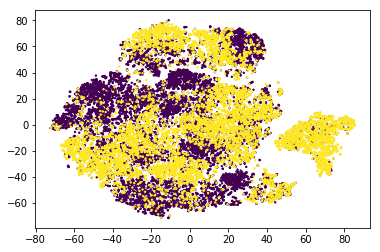

9951 8344


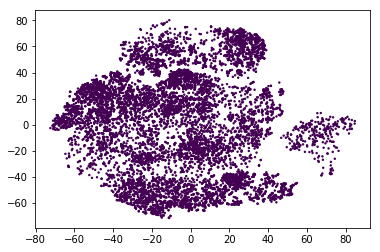

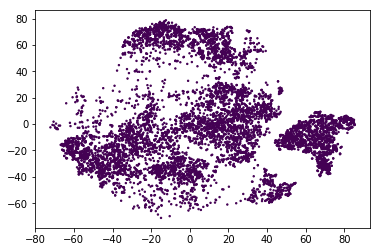

[[ 3.53815119e-08  2.21000770e-09]
 [ 1.20679138e-07 -1.33013851e-07]
 [-6.81007943e-08  4.40878785e-08]
 [-7.28514115e-08  1.68984792e-07]
 [-1.80074830e-07  9.03971523e-08]
 [ 4.55008372e-01  4.59278315e-01]
 [ 4.60442845e-01  4.61428854e-01]
 [ 4.61871414e-01  4.62767176e-01]
 [ 4.63099392e-01  4.63963627e-01]
 [ 4.64092494e-01  4.64449144e-01]
 [ 4.65431999e-01  4.66035742e-01]
 [ 4.66132293e-01  4.66464115e-01]
 [ 4.66615051e-01  4.67179779e-01]
 [ 4.67711010e-01  4.67437119e-01]
 [ 4.67673571e-01  4.67789433e-01]
 [ 4.68477117e-01  4.68722634e-01]
 [ 4.68785688e-01  4.68753373e-01]
 [ 4.69012288e-01  4.69050909e-01]
 [ 4.69649923e-01  4.69535243e-01]
 [ 4.69638494e-01  4.69382337e-01]
 [ 4.69775243e-01  4.70234749e-01]
 [ 4.70619773e-01  4.70883024e-01]
 [ 4.70954354e-01  4.71160068e-01]
 [ 4.71633762e-01  4.71711397e-01]
 [ 4.72239869e-01  4.72763218e-01]
 [ 4.73221148e-01  4.72257997e-01]
 [ 4.72395534e-01  4.72098786e-01]
 [ 4.72248933e-01  4.72486568e-01]
 [ 4.73238094e-01  4

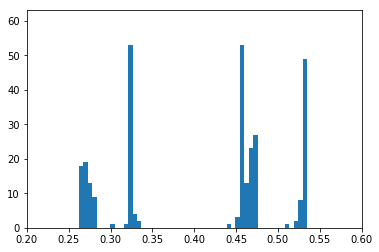

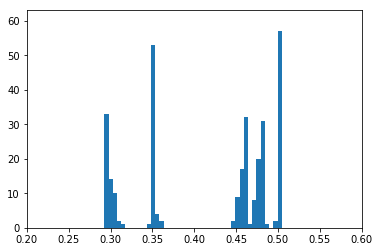

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 320, 2)       0                                            
__________________________________________________________________________________________________
gaussian_noise_5 (GaussianNoise (None, 320, 2)       0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_101 (Conv1D)             (None, 160, 32)      224         gaussian_noise_5[0][0]           
__________________________________________________________________________________________________
batch_normalization_53 (BatchNo (None, 160, 32)      128         conv1d_101[0][0]                 
__________________________________________________________________________________________________
dropout_21

12000 /groups2/gac50430/nanopore/dataset4DL/train/TGACG.pq 12000 47737 signal          b'\x88\x81zwx{\x81\x89\x83\x82ttt}\x82\x86\x81...
originalsize                                 [26, 17, 65, 16, 12]
Name: 47737, dtype: object
totalcnt 12000
train_x.shape (19902, 320)
test_x.shape (19902, 320)
train_y.shape (19902, 320)
test_y.shape (19902, 320)
1 classes
y_train shape: (9951,)
y_test shape: (2049,)
train_x: (9951, 320, 2)
train_y: (9951, 1)
test_x shape: (2049, 320, 2)
test_y shape: (2049, 1)
totalcnt 10000
train_x.shape (16688, 320)
test_x.shape (16688, 320)
train_y.shape (16688, 320)
test_y.shape (16688, 320)
1 classes
y_train shape: (8344,)
y_test shape: (1656,)
train_x: (8344, 320, 2)
train_y: (8344, 1)
test_x shape: (1656, 320, 2)
test_y shape: (1656, 1)
[[ -7.603156    9.145591    3.8589375 ...   6.385569   11.366417
   71.12422  ]
 [ -6.4314003 -13.537763   12.3465605 ...  -5.437462    2.8098185
   45.864643 ]
 [-16.93468   -14.5963745   5.958451  ... -11.228372   -5.013932


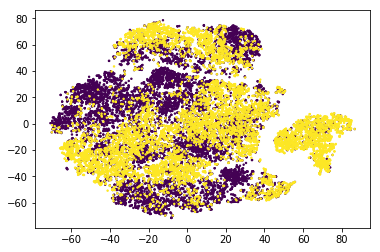

9951 8344


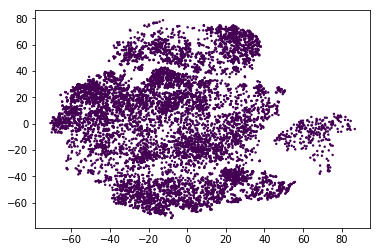

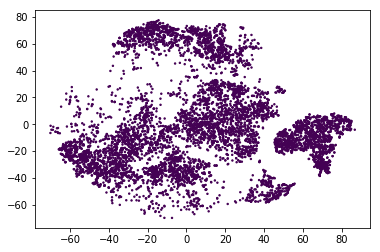

[[-6.45998978e-08  5.80857341e-09]
 [ 1.67713563e-07  9.10604173e-09]
 [ 1.06634646e-07 -3.49757753e-08]
 [-1.30355954e-07  1.30089974e-07]
 [ 7.43702908e-08  3.81449450e-08]
 [ 4.55008372e-01  4.59278315e-01]
 [ 4.60442845e-01  4.61428854e-01]
 [ 4.61871414e-01  4.62767176e-01]
 [ 4.63099392e-01  4.63963627e-01]
 [ 4.64092494e-01  4.64449144e-01]
 [ 4.65431999e-01  4.66035742e-01]
 [ 4.66132293e-01  4.66464115e-01]
 [ 4.66615051e-01  4.67179779e-01]
 [ 4.67711010e-01  4.67437119e-01]
 [ 4.67673571e-01  4.67789433e-01]
 [ 4.68477117e-01  4.68722634e-01]
 [ 4.68785688e-01  4.68753373e-01]
 [ 4.69012288e-01  4.69050909e-01]
 [ 4.69649923e-01  4.69535243e-01]
 [ 4.69638494e-01  4.69382337e-01]
 [ 4.69775243e-01  4.70234749e-01]
 [ 4.70619773e-01  4.70883024e-01]
 [ 4.70954354e-01  4.71160068e-01]
 [ 4.71633762e-01  4.71711397e-01]
 [ 4.72239869e-01  4.72763218e-01]
 [ 4.73221148e-01  4.72257997e-01]
 [ 4.72395534e-01  4.72098786e-01]
 [ 4.72248933e-01  4.72486568e-01]
 [ 4.73238094e-01  4

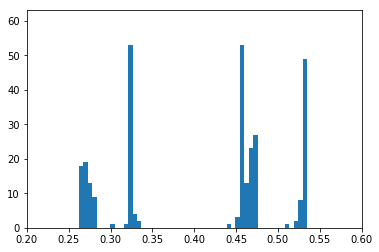

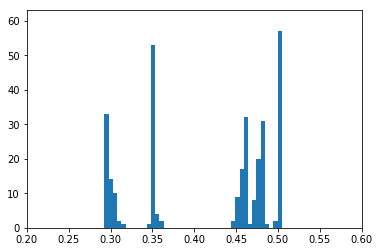

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 320, 2)       0                                            
__________________________________________________________________________________________________
gaussian_noise_6 (GaussianNoise (None, 320, 2)       0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1d_126 (Conv1D)             (None, 160, 32)      224         gaussian_noise_6[0][0]           
__________________________________________________________________________________________________
batch_normalization_66 (BatchNo (None, 160, 32)      128         conv1d_126[0][0]                 
__________________________________________________________________________________________________
dropout_26

12000 /groups2/gac50430/nanopore/dataset4DL/train/TGACG.pq 12000 47737 signal          b'\x88\x81zwx{\x81\x89\x83\x82ttt}\x82\x86\x81...
originalsize                                 [26, 17, 65, 16, 12]
Name: 47737, dtype: object
totalcnt 12000
train_x.shape (19902, 320)
test_x.shape (19902, 320)
train_y.shape (19902, 320)
test_y.shape (19902, 320)
1 classes
y_train shape: (9951,)
y_test shape: (2049,)
train_x: (9951, 320, 2)
train_y: (9951, 1)
test_x shape: (2049, 320, 2)
test_y shape: (2049, 1)
totalcnt 10000
train_x.shape (16688, 320)
test_x.shape (16688, 320)
train_y.shape (16688, 320)
test_y.shape (16688, 320)
1 classes
y_train shape: (8344,)
y_test shape: (1656,)
train_x: (8344, 320, 2)
train_y: (8344, 1)
test_x shape: (1656, 320, 2)
test_y shape: (1656, 1)
[[ -7.606279     9.138584     3.897451   ...   6.374215    11.37163
   71.14724   ]
 [ -6.4289284  -13.56389     12.3321705  ...  -5.423812     2.8043687
   45.834915  ]
 [-16.910328   -14.621054     5.9571652  ... -11.220339 

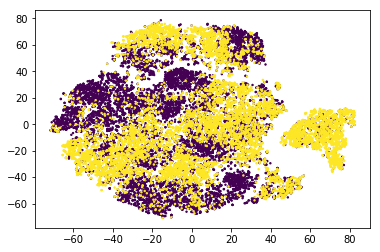

9951 8344


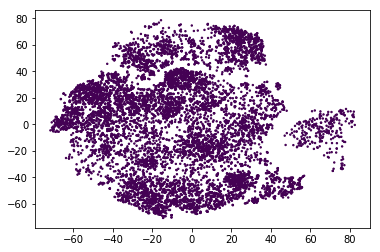

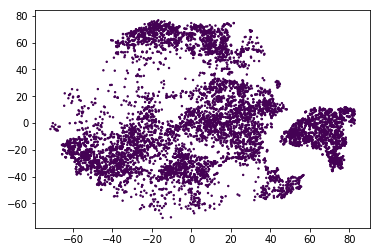

[[-2.16680341e-07  1.36371605e-07]
 [ 2.44342236e-07  5.06112650e-08]
 [-5.19609494e-09 -1.67990108e-07]
 [-1.04614252e-08  1.70220810e-07]
 [-4.85100133e-08  1.17921558e-07]
 [ 4.55008372e-01  4.59278315e-01]
 [ 4.60442845e-01  4.61428854e-01]
 [ 4.61871414e-01  4.62767176e-01]
 [ 4.63099392e-01  4.63963627e-01]
 [ 4.64092494e-01  4.64449144e-01]
 [ 4.65431999e-01  4.66035742e-01]
 [ 4.66132293e-01  4.66464115e-01]
 [ 4.66615051e-01  4.67179779e-01]
 [ 4.67711010e-01  4.67437119e-01]
 [ 4.67673571e-01  4.67789433e-01]
 [ 4.68477117e-01  4.68722634e-01]
 [ 4.68785688e-01  4.68753373e-01]
 [ 4.69012288e-01  4.69050909e-01]
 [ 4.69649923e-01  4.69535243e-01]
 [ 4.69638494e-01  4.69382337e-01]
 [ 4.69775243e-01  4.70234749e-01]
 [ 4.70619773e-01  4.70883024e-01]
 [ 4.70954354e-01  4.71160068e-01]
 [ 4.71633762e-01  4.71711397e-01]
 [ 4.72239869e-01  4.72763218e-01]
 [ 4.73221148e-01  4.72257997e-01]
 [ 4.72395534e-01  4.72098786e-01]
 [ 4.72248933e-01  4.72486568e-01]
 [ 4.73238094e-01  4

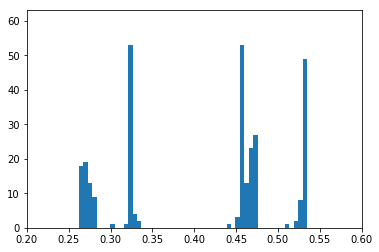

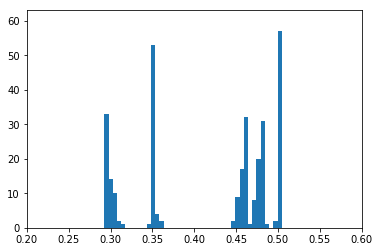

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 320, 2)       0                                            
__________________________________________________________________________________________________
gaussian_noise_7 (GaussianNoise (None, 320, 2)       0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_151 (Conv1D)             (None, 160, 32)      224         gaussian_noise_7[0][0]           
__________________________________________________________________________________________________
batch_normalization_79 (BatchNo (None, 160, 32)      128         conv1d_151[0][0]                 
__________________________________________________________________________________________________
dropout_31

12000 /groups2/gac50430/nanopore/dataset4DL/train/TGACG.pq 12000 47737 signal          b'\x88\x81zwx{\x81\x89\x83\x82ttt}\x82\x86\x81...
originalsize                                 [26, 17, 65, 16, 12]
Name: 47737, dtype: object
totalcnt 12000
train_x.shape (19902, 320)
test_x.shape (19902, 320)
train_y.shape (19902, 320)
test_y.shape (19902, 320)
1 classes
y_train shape: (9951,)
y_test shape: (2049,)
train_x: (9951, 320, 2)
train_y: (9951, 1)
test_x shape: (2049, 320, 2)
test_y shape: (2049, 1)
totalcnt 10000
train_x.shape (16688, 320)
test_x.shape (16688, 320)
train_y.shape (16688, 320)
test_y.shape (16688, 320)
1 classes
y_train shape: (8344,)
y_test shape: (1656,)
train_x: (8344, 320, 2)
train_y: (8344, 1)
test_x shape: (1656, 320, 2)
test_y shape: (1656, 1)
[[ -7.5972395    9.13462      3.8862472  ...   6.379987    11.38145
   71.13513   ]
 [ -6.4300942  -13.60129     12.307543   ...  -5.4110284    2.7897851
   45.84633   ]
 [-16.931808   -14.566318     5.9667697  ... -11.2314005

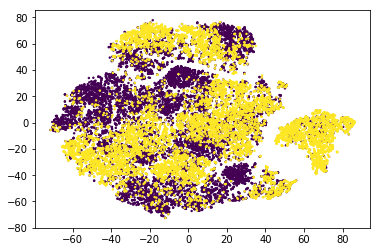

9951 8344


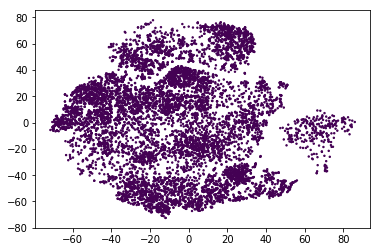

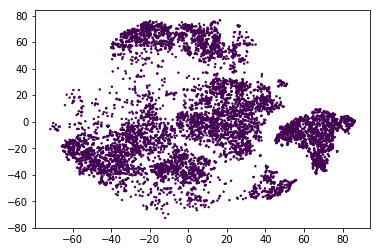

[[-2.57082953e-07 -8.62431334e-08]
 [-3.73772109e-08 -1.47074445e-07]
 [-6.98096725e-08  1.24192887e-07]
 [-1.10483121e-07 -2.25282663e-07]
 [-9.84732013e-08 -1.72478386e-07]
 [ 4.55008372e-01  4.59278315e-01]
 [ 4.60442845e-01  4.61428854e-01]
 [ 4.61871414e-01  4.62767176e-01]
 [ 4.63099392e-01  4.63963627e-01]
 [ 4.64092494e-01  4.64449144e-01]
 [ 4.65431999e-01  4.66035742e-01]
 [ 4.66132293e-01  4.66464115e-01]
 [ 4.66615051e-01  4.67179779e-01]
 [ 4.67711010e-01  4.67437119e-01]
 [ 4.67673571e-01  4.67789433e-01]
 [ 4.68477117e-01  4.68722634e-01]
 [ 4.68785688e-01  4.68753373e-01]
 [ 4.69012288e-01  4.69050909e-01]
 [ 4.69649923e-01  4.69535243e-01]
 [ 4.69638494e-01  4.69382337e-01]
 [ 4.69775243e-01  4.70234749e-01]
 [ 4.70619773e-01  4.70883024e-01]
 [ 4.70954354e-01  4.71160068e-01]
 [ 4.71633762e-01  4.71711397e-01]
 [ 4.72239869e-01  4.72763218e-01]
 [ 4.73221148e-01  4.72257997e-01]
 [ 4.72395534e-01  4.72098786e-01]
 [ 4.72248933e-01  4.72486568e-01]
 [ 4.73238094e-01  4

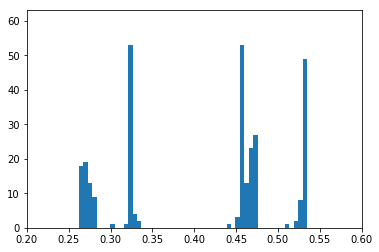

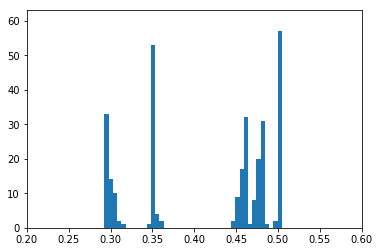

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 320, 2)       0                                            
__________________________________________________________________________________________________
gaussian_noise_8 (GaussianNoise (None, 320, 2)       0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1d_176 (Conv1D)             (None, 160, 32)      224         gaussian_noise_8[0][0]           
__________________________________________________________________________________________________
batch_normalization_92 (BatchNo (None, 160, 32)      128         conv1d_176[0][0]                 
__________________________________________________________________________________________________
dropout_36

12000 /groups2/gac50430/nanopore/dataset4DL/train/TGACG.pq 12000 47737 signal          b'\x88\x81zwx{\x81\x89\x83\x82ttt}\x82\x86\x81...
originalsize                                 [26, 17, 65, 16, 12]
Name: 47737, dtype: object
totalcnt 12000
train_x.shape (19902, 320)
test_x.shape (19902, 320)
train_y.shape (19902, 320)
test_y.shape (19902, 320)
1 classes
y_train shape: (9951,)
y_test shape: (2049,)
train_x: (9951, 320, 2)
train_y: (9951, 1)
test_x shape: (2049, 320, 2)
test_y shape: (2049, 1)
totalcnt 10000
train_x.shape (16688, 320)
test_x.shape (16688, 320)
train_y.shape (16688, 320)
test_y.shape (16688, 320)
1 classes
y_train shape: (8344,)
y_test shape: (1656,)
train_x: (8344, 320, 2)
train_y: (8344, 1)
test_x shape: (1656, 320, 2)
test_y shape: (1656, 1)
[[ -7.599847     9.135116     3.8751915  ...   6.383197    11.372345
   71.128     ]
 [ -6.41612    -13.549814    12.344015   ...  -5.416804     2.8139133
   45.851723  ]
 [-16.947542   -14.617276     5.9534235  ... -11.23565 

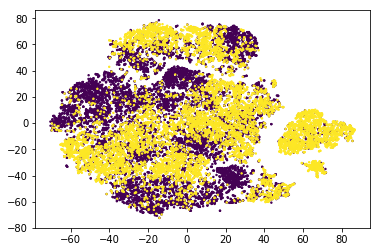

9951 8344


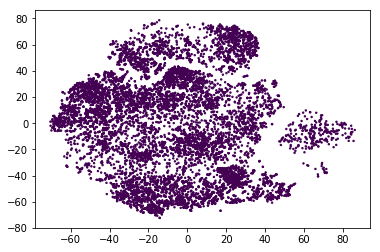

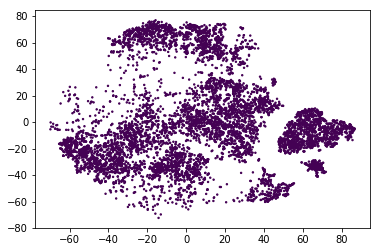

[[-3.70172349e-07 -2.08024794e-07]
 [ 2.43010602e-09 -1.54158017e-08]
 [-1.24164277e-07 -3.87383088e-08]
 [ 2.16966835e-07  1.87841056e-08]
 [ 1.97209077e-07  1.23237446e-07]
 [ 4.55008372e-01  4.59278315e-01]
 [ 4.60442845e-01  4.61428854e-01]
 [ 4.61871414e-01  4.62767176e-01]
 [ 4.63099392e-01  4.63963627e-01]
 [ 4.64092494e-01  4.64449144e-01]
 [ 4.65431999e-01  4.66035742e-01]
 [ 4.66132293e-01  4.66464115e-01]
 [ 4.66615051e-01  4.67179779e-01]
 [ 4.67711010e-01  4.67437119e-01]
 [ 4.67673571e-01  4.67789433e-01]
 [ 4.68477117e-01  4.68722634e-01]
 [ 4.68785688e-01  4.68753373e-01]
 [ 4.69012288e-01  4.69050909e-01]
 [ 4.69649923e-01  4.69535243e-01]
 [ 4.69638494e-01  4.69382337e-01]
 [ 4.69775243e-01  4.70234749e-01]
 [ 4.70619773e-01  4.70883024e-01]
 [ 4.70954354e-01  4.71160068e-01]
 [ 4.71633762e-01  4.71711397e-01]
 [ 4.72239869e-01  4.72763218e-01]
 [ 4.73221148e-01  4.72257997e-01]
 [ 4.72395534e-01  4.72098786e-01]
 [ 4.72248933e-01  4.72486568e-01]
 [ 4.73238094e-01  4

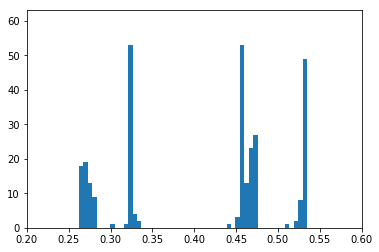

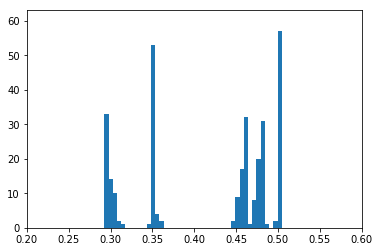

In [5]:
import glob
from sklearn.model_selection import train_test_split
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf # add
import numpy as np
import cnn_network
import ndoc_util
from keras.layers import GlobalAveragePooling1D,Dense
from keras.models import Model
from keras.engine.network import Network
from keras.optimizers import SGD
from keras import backend as K
import itertools
from keras.utils.training_utils import multi_gpu_model 
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler



DATA_LENGTH_UNIT = 60
DATA_LENGTH = DATA_LENGTH_UNIT*5+20

def prepData(s_data,nuc):
    
    
    
    train_x = []
    test_x = []
    train_y = []
    test_y = []
    p_flg = 0
    flg = 0    
    totalcnt = 0
    path = s_data+"/"+nuc+".pq"

    

    
    table = pq.read_table(path)
    df = table.to_pandas()
    df = df[['signal','originalsize']]
    cnt = 0
    for idx, row in df.iterrows():


        signal = np.array(list(row[0]))
        signal = ndoc_util.zeropadding10(signal)
        signal = np.array(signal)
        signal = signal.astype('float32')/255.  

        originalsize = np.array(ndoc_util.extendAry(row[1]))
        originalsize = ndoc_util.zeropadding10(originalsize)

#         if cnt < 10:
#             print(path.replace(s_data+"/",""))
#             fmer = path.replace(s_data+"/","").replace(".pq","")
#             plt.title(fmer)
#             plt.plot(signal)
#             plt.show()
#             plt.plot(originalsize)
#             plt.show()


        testidx = (idx%12 >= 10)
        if testidx:
            test_x.append(signal)
            test_x.append(originalsize)
            test_y.append(flg)
        else:
            train_x.append(signal)
            train_x.append(originalsize)
            train_y.append(flg)   

        cnt = cnt+1
        totalcnt = totalcnt+1  

        if cnt % 12000 == 0:
            print(totalcnt,path,totalcnt,idx,row)
        if cnt == 12000:
            break

                   
  
    
    print("totalcnt",totalcnt)
        
    train_x = np.array(train_x)
    test_x = np.array(test_x)
    train_y = np.array(train_y)
    test_y = np.array(test_y)
    num_classes = np.unique(train_y).size
        
    print("train_x.shape",train_x.shape)
    print("test_x.shape",train_x.shape)
    print("train_y.shape",train_x.shape)
    print("test_y.shape",train_x.shape)

    print(num_classes, 'classes')

    print('y_train shape:',train_y.shape)
    print('y_test shape:', test_y.shape)
    
    train_x = np.reshape(train_x, (-1, DATA_LENGTH,2))
    test_x= np.reshape(test_x, (-1, DATA_LENGTH,2))
    train_y = np.reshape(train_y, (-1, 1, ))
    test_y = np.reshape(test_y, (-1, 1, ))

    test_y = test_y -1
    train_y = train_y-1
    train_y = keras.utils.to_categorical(train_y, num_classes)
    test_y = keras.utils.to_categorical(test_y, num_classes)
  
    print('train_x:', train_x.shape)
    print('train_y:', train_y.shape)   
    print('test_x shape:',test_x.shape)
    print('test_y shape:', test_y.shape)  

    return train_x,test_x,train_y,test_y,num_classes   

            
from sklearn.manifold import TSNE   
from matplotlib import pyplot as plt

def main(s_data,s_data_mod,nuc,loadpath):
    
    gpu_count = 4
    batch_size = 1024
    num_classes_org = 1024
    num_classes = 63
    shape1=(None,  DATA_LENGTH,2)
    
    
    with tf.device("/cpu:0"):
        
        model = cnn_network.build_network(shape=shape1, num_classes=num_classes_org)  
       
        model.layers.pop() #remove last layer
        model.layers.pop() #remove last layer
        model.layers.pop() #remove last layer

        flat = GlobalAveragePooling1D()(model.layers[-1].output)
        model_t = Model(inputs=model.input,outputs=flat)
        
        model_t.load_weights(loadpath)
        model_t.summary()
    
    x_train,test_x,train_y,test_y,num_classes =  prepData(s_data,nuc)
    x_trainm,test_xm,train_ym,test_ym,num_classes =  prepData(s_data_mod,nuc)
    
    data = np.concatenate([x_train,x_trainm])
    labeld = [0]*len(x_train) + [1]*len(x_trainm)
    pddata = model_t.predict(data)
    
    n_components = 2
    tsne = TSNE(n_components=n_components, init='random', random_state=0)
    print(pddata)
    d = tsne.fit_transform(pddata)
    plt.scatter(d[:,0], d[:,1], c=labeld,s=2)
    plt.show()
    
    d0,d1 = np.split(d, [len(x_train)])
    labeld0,labeld1 = np.split(labeld, [len(x_train)])
    
    print(len(x_train),len(x_trainm))
    plt.scatter(d0[:,0], d0[:,1], c=labeld0,s=2)
    plt.show()
    
    plt.scatter(d1[:,0], d1[:,1], c=labeld1,s=2)
    plt.show()
    
    txmean = np.mean(x_train, axis=0)
    txmeanA = np.mean(x_trainm, axis=0)
#     print(txmean)
#     print(txmeanA)
    
    data0 = []
    cnt = 0
    mc = 0
    for x in np.nditer(txmean):
        
        if cnt%1 ==0:
             data0.append(x)
             mc = mc+1   
        cnt = cnt+1
    
    data1 = []
    for x in np.nditer(txmeanA):
        
        if cnt%1 ==0:
             data1.append(x)         
        cnt = cnt+1        
        
    plt.xlim(0.2,0.6)
    plt.hist(data0,bins=100)
    plt.show()
    
    plt.xlim(0.2,0.6)
    plt.hist(data1,bins=100)
    plt.show()

if __name__ == '__main__':    
    
    s_data ="/groups2/gac50430/nanopore/dataset4DL/train"
    s_data_mod ="/groups2/gac50430/nanopore/dataset4DL/m6a"
    nuc = "TGACG"
    
    loadpath = "/fs2/groups2/gac50430/nanopore/dataset4DL/weight5mer/TGACG/model_t_ep_2.h5"
    main(s_data,s_data_mod,nuc,loadpath)
    
    loadpath = "/fs2/groups2/gac50430/nanopore/dataset4DL/weight5mer/TGACG/model_t_ep_4.h5"
    main(s_data,s_data_mod,nuc,loadpath)
    
    
    loadpath = "/fs2/groups2/gac50430/nanopore/dataset4DL/weight5mer/TGACG/model_t_ep_7.h5"
    main(s_data,s_data_mod,nuc,loadpath)
    
    loadpath = "/fs2/groups2/gac50430/nanopore/dataset4DL/weight5mer/TGACG/model_t_ep_11.h5"
    main(s_data,s_data_mod,nuc,loadpath)  
    
    loadpath = "/fs2/groups2/gac50430/nanopore/dataset4DL/weight5mer/TGACG/model_t_ep_19.h5"
    main(s_data,s_data_mod,nuc,loadpath)    
    
    

In [3]:
import importlib
import cnn_network
importlib.reload(cnn_network)

Using TensorFlow backend.
ERROR:root:
UnicodeDecodeError while processing traceback.



UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 2767: invalid start byte

## ANN to detect difference

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 320, 2)       0                                            
__________________________________________________________________________________________________
gaussian_noise_19 (GaussianNois (None, 320, 2)       0           input_19[0][0]                   
__________________________________________________________________________________________________
conv1d_451 (Conv1D)             (None, 160, 32)      224         gaussian_noise_19[0][0]          
__________________________________________________________________________________________________
batch_normalization_235 (BatchN (None, 160, 32)      128         conv1d_451[0][0]                 
__________________________________________________________________________________________________
dropout_91

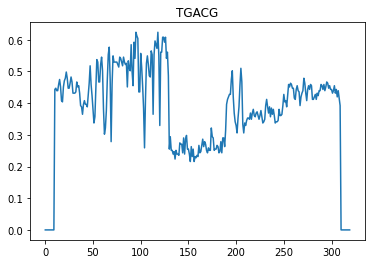

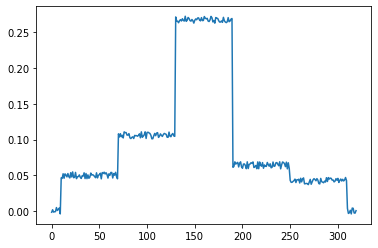

TGACG.pq


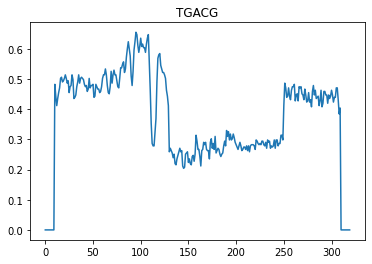

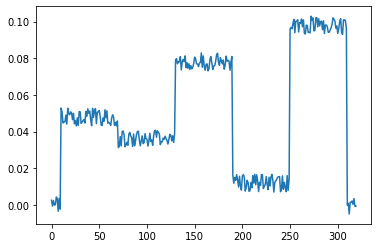

TGACG.pq


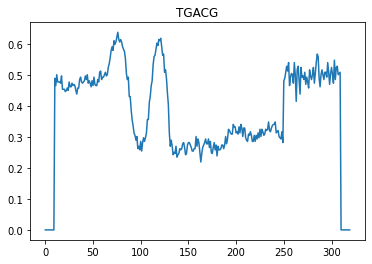

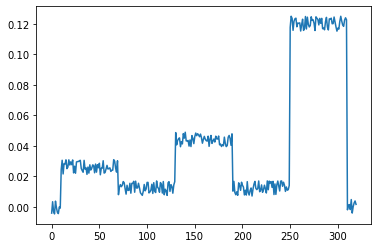

TGACG.pq


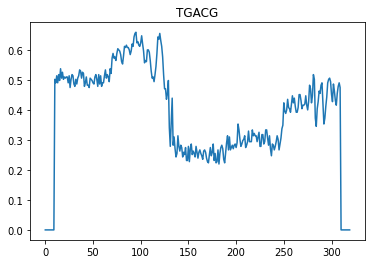

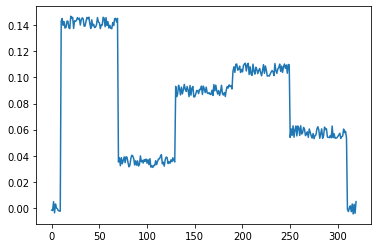

TGACG.pq


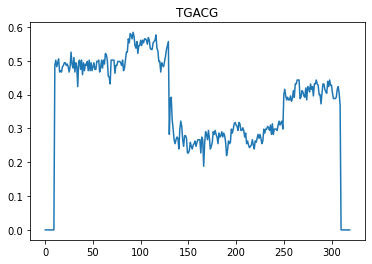

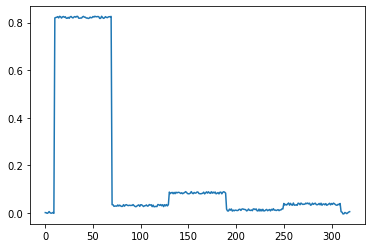

TGACG.pq


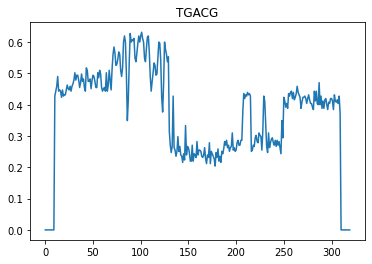

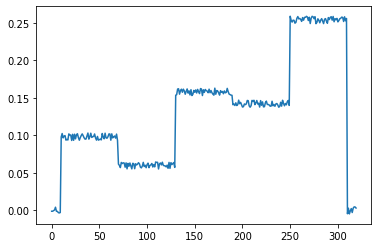

TGACG.pq


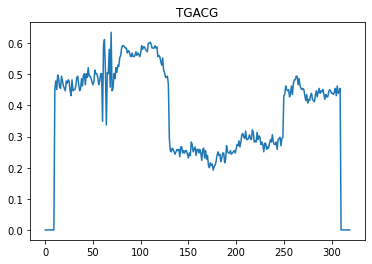

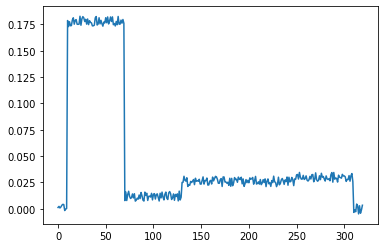

TGACG.pq


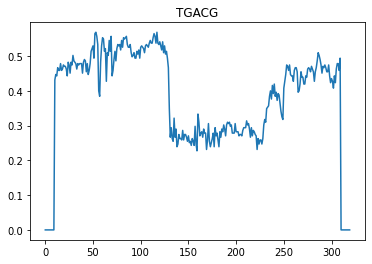

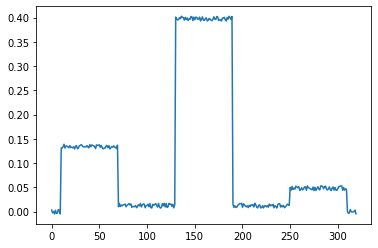

TGACG.pq


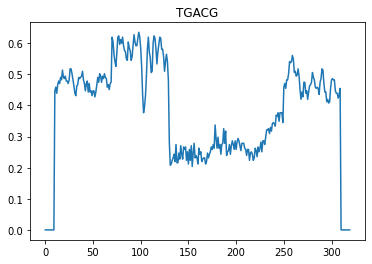

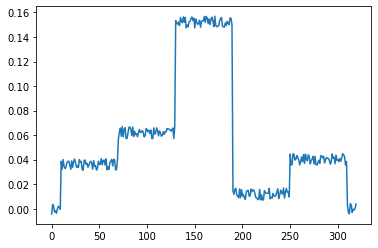

totalcnt 46000
train_x.shape (92000, 320)
train_y.shape (92000, 320)
1 classes
y_train shape: (46000,)
train_x: (46000, 320, 2)
train_y: (46000, 1)
TGACG.pq


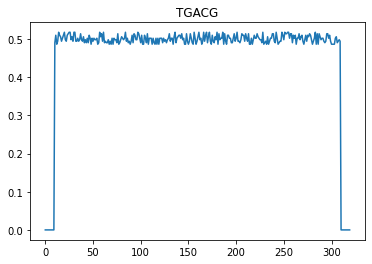

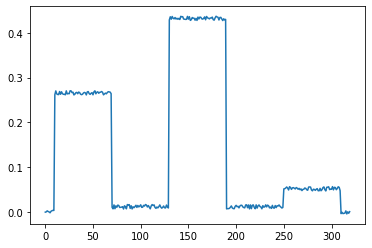

TGACG.pq


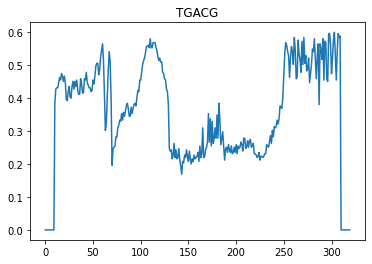

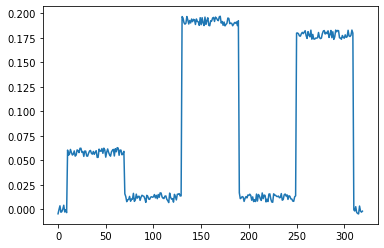

TGACG.pq


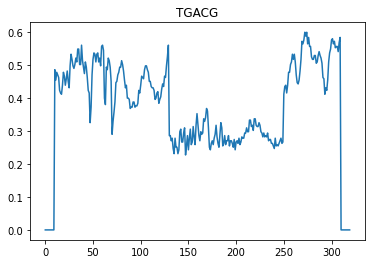

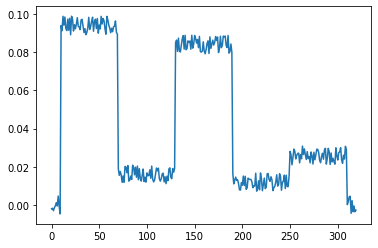

TGACG.pq


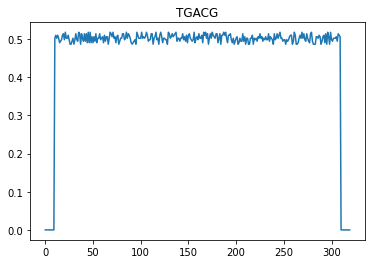

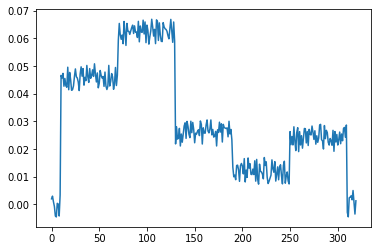

TGACG.pq


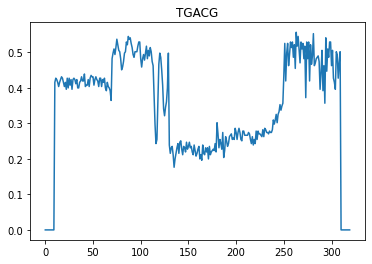

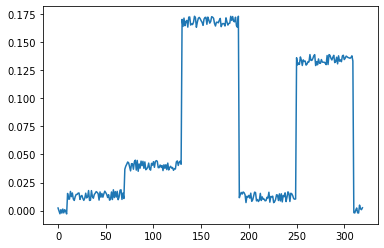

TGACG.pq


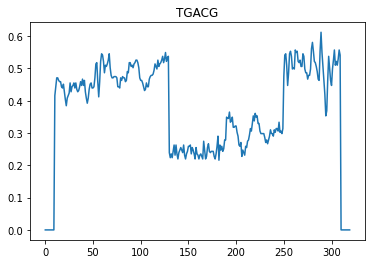

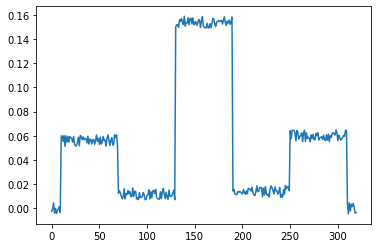

TGACG.pq


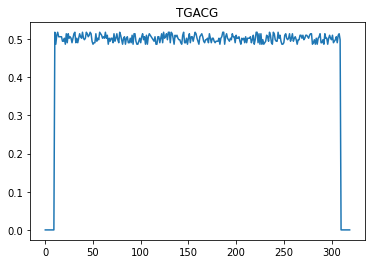

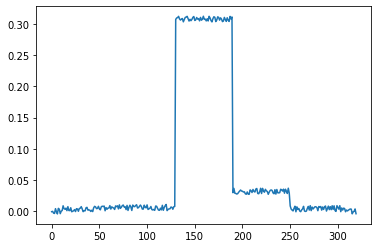

TGACG.pq


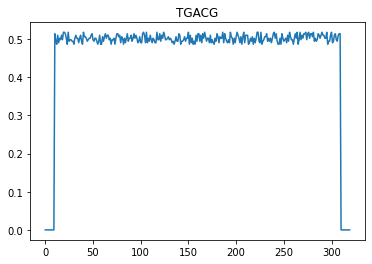

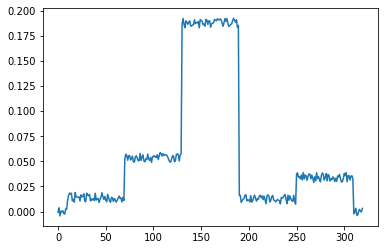

TGACG.pq


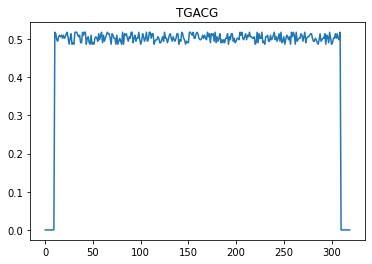

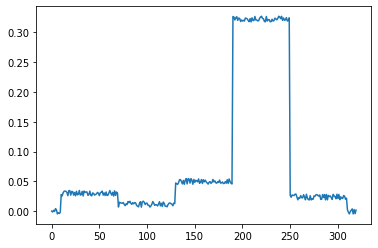

totalcnt 10000
train_x.shape (20000, 320)
train_y.shape (20000, 320)
1 classes
y_train shape: (10000,)
train_x: (10000, 320, 2)
train_y: (10000, 1)
46000
10000
[0 0 1 ... 0 0 0]
[0 2 0 ... 0 0 0]


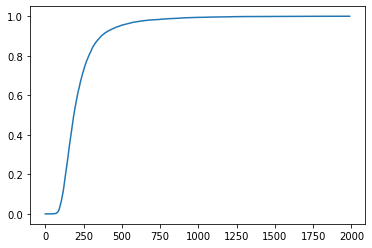

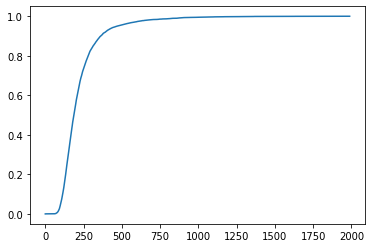

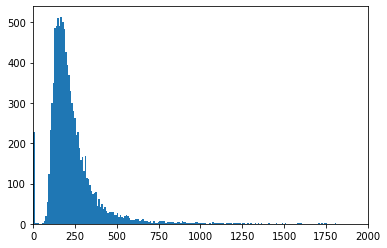

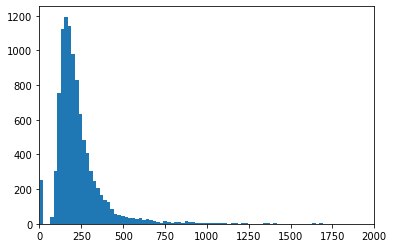

[3 5 6 ... 0 0 0]
[0 0 0 ... 0 0 0]


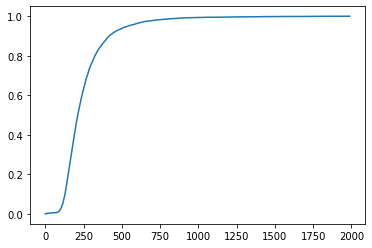

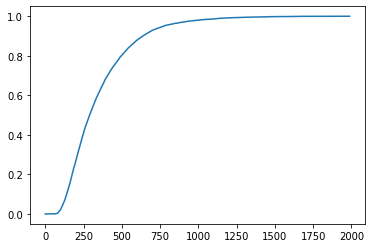

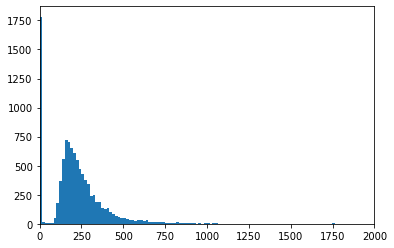

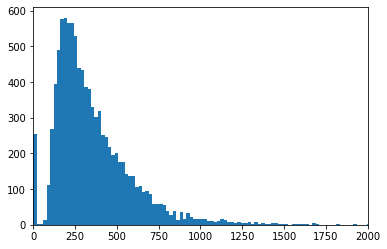

[0 0 0 ... 0 0 0]
[0 0 2 ... 0 0 0]


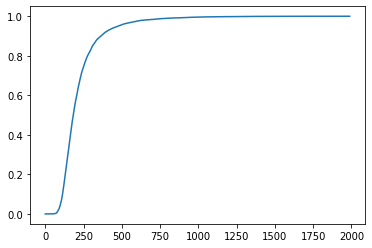

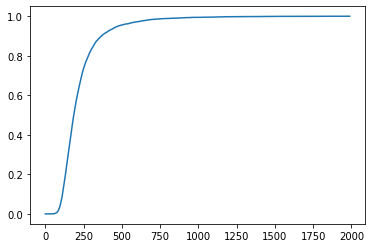

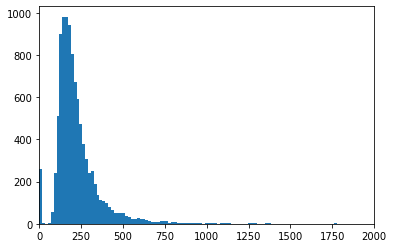

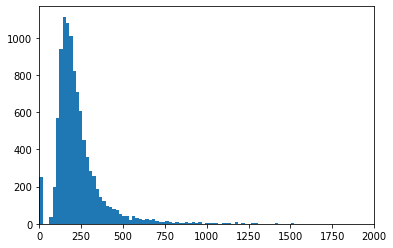

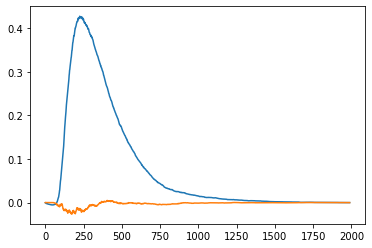

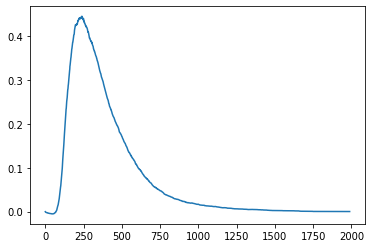

159.8676458774508


In [19]:
import glob
from sklearn.model_selection import train_test_split
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf # add
import numpy as np
import cnn_network
import ndoc_util
from keras.layers import GlobalAveragePooling1D,Dense
from keras.models import Model
from keras.engine.network import Network
from keras.optimizers import SGD
from keras import backend as K
import itertools
from keras.utils.training_utils import multi_gpu_model 
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler



DATA_LENGTH_UNIT = 60
DATA_LENGTH = DATA_LENGTH_UNIT*5+20

def prepData(s_data,nuc):
    
    
    
    train_x = []
    test_x = []
    train_y = []
    test_y = []
    p_flg = 0
    flg = 0    
    totalcnt = 0
    path = s_data+"/"+nuc+".pq"

    

    
    table = pq.read_table(path)
    df = table.to_pandas()
    df = df[['signal','originalsize']]
    cnt = 0
    totalcnt=0
    for idx, row in df.iterrows():

        cnt = cnt+1
        totalcnt = totalcnt+1 

        signal = np.array(list(row[0]))
        signal = ndoc_util.zeropadding10(signal)
        signal = np.array(signal)
        signal = signal.astype('float32')/255.  

        originalsize = np.array(ndoc_util.extendAry(row[1]))
        originalsize = ndoc_util.zeropadding10(originalsize)

        if cnt < 10:
            print(path.replace(s_data+"/",""))
            fmer = path.replace(s_data+"/","").replace(".pq","")
            plt.title(fmer)
            plt.plot(signal)
            plt.show()
            plt.plot(originalsize)
            plt.show()



        train_x.append(signal)
        train_x.append(originalsize)
        train_y.append(flg)   
                  
  
    
    print("totalcnt",totalcnt)
        
    train_x = np.array(train_x)
    train_y = np.array(train_y)
    num_classes = np.unique(train_y).size
        
    print("train_x.shape",train_x.shape)
    print("train_y.shape",train_x.shape)


    print(num_classes, 'classes')

    print('y_train shape:',train_y.shape)

    
    train_x = np.reshape(train_x, (-1, DATA_LENGTH,2))
    train_y = np.reshape(train_y, (-1, 1, ))

    train_y = train_y-1
    train_y = keras.utils.to_categorical(train_y, num_classes)
  
    print('train_x:', train_x.shape)
    print('train_y:', train_y.shape)   

    return train_x,train_y   

            
from sklearn.manifold import TSNE   
from matplotlib import pyplot as plt
import faiss
from sklearn.model_selection import train_test_split


def getDist(a,b):
    
    index = faiss.IndexFlatL2(a.shape[1])   # build the index
    index.add(a)                  # add vectors to the index
    dists, result = index.search(b, k=5)     # actual search
    
    index = faiss.IndexFlatL2(b.shape[1])   # build the index
    index.add(b)                  # add vectors to the index
    dists2, result2 = index.search(a, k=5)     # actual search
    
    dists = np.mean(dists, axis=1)
    dists2 = np.mean(dists2, axis=1)
    
    return dists,dists2

def acc(dist):
    hist,idx = np.histogram(dist, range=(10,2000),bins=1990)
    print(hist)
    acc = np.add.accumulate(hist)
    maxv = np.max(acc)
    acc = acc/maxv
    return acc

def normalize(v, axis=-1, order=2):
    l2 = np.linalg.norm(v, ord = order, axis=axis, keepdims=True)
    l2[l2==0] = 1
    return v/l2

def histG(dist):
    plt.xlim(0, 2000)
    plt.hist(dist, bins=200)
    plt.show()

def main(s_data,s_data_mod,nuc):
    
    gpu_count = 4
    batch_size = 1024
    num_classes_org = 1024
    num_classes = 63
    shape1=(None,  DATA_LENGTH,2)
    save_path = "/fs2/groups2/gac50430/nanopore/dataset4DL/weight5mer/TGACG/model_t_ep_4.h5"
    
    with tf.device("/cpu:0"):
        
        model = cnn_network.build_network(shape=shape1, num_classes=num_classes_org)  
       
        model.layers.pop() #remove last layer
        model.layers.pop() #remove last layer
        model.layers.pop() #remove last layer

        flat = GlobalAveragePooling1D()(model.layers[-1].output)
        model_t = Model(inputs=model.input,outputs=flat)
        
        model_t.load_weights(save_path)
        model_t.summary()
    
    x_train,train_y =  prepData(s_data,nuc)
    
    a_train, a_test = train_test_split(x_train, test_size=10000)
    b_train, b_test = train_test_split(a_train, test_size=10000)
    c_train, c_test = train_test_split(b_train, test_size=10000)
    
    x_trainm,test_ym =  prepData(s_data_mod,nuc)
    
    print(len(x_train))
    print(len(x_trainm))

    xref = model_t.predict(a_test)
    xref2 = model_t.predict(b_test)
    xref3 = model_t.predict(c_test)
    xmod = model_t.predict(x_trainm)
    
        
    dist1,dist2 = getDist(xref,xref2)
    acc1r,acc2r = acc(dist1),acc(dist2)
    plt.plot(acc1r)
    plt.show()
    
    plt.plot(acc2r)
    plt.show()
    
    histG(dist1)
    histG(dist2)
    
    dist1,dist2 = getDist(xref,xmod)
    acc1,acc2 = acc(dist1),acc(dist2)
    
    plt.plot(acc1)
    plt.show()
    
    plt.plot(acc2)
    plt.show()

    histG(dist1)
    histG(dist2)
    
    diff1 = acc1r - acc1
    diff2 = acc2r - acc2
    
    diffsum0 = diff1+diff2
    
  
    
    dist1,dist2 = getDist(xref,xref3)
    acc1,acc2 = acc(dist1),acc(dist2)
    
    plt.plot(acc1)
    plt.show()
    
    plt.plot(acc2)
    plt.show()

    histG(dist1)
    histG(dist2)
    
    diff1 = acc1r - acc1
    diff2 = acc2r - acc2
    
    diffsum = diff1+diff2
    
    plt.plot(diffsum0)
    plt.plot(diffsum)
    plt.show() 
    
    scores = diffsum0 - diffsum
    
    plt.plot(scores)
    plt.show() 
   
    print(sum(scores))

if __name__ == '__main__':    
    
    s_data ="/groups2/gac50430/nanopore/dataset4DL/train"
    s_data_mod ="/groups2/gac50430/nanopore/dataset4DL/m6a"
    nuc = "TGACG"
    
    main(s_data,s_data_mod,nuc)

In [ ]:
! conda install faiss-gpu cuda90 -c pytorch

Solving environment: done

## Package Plan ##

  environment location: /home/aca10238jw/anaconda3

  added / updated specs:
    - cuda90
    - faiss-gpu


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cuda90-1.0                 |       h6433d27_0           3 KB  pytorch
    cudatoolkit-10.2.89        |       hfd86e86_1       540.0 MB
    faiss-gpu-1.6.3            |   py37h1a5d453_0        34.2 MB  pytorch
    ------------------------------------------------------------
                                           Total:       574.2 MB

The following NEW packages will be INSTALLED:

  cuda90             pytorch/linux-64::cuda90-1.0-h6433d27_0
  cudatoolkit        pkgs/main/linux-64::cudatoolkit-10.2.89-hfd86e86_1
  faiss-gpu          pytorch/linux-64::faiss-gpu-1.6.3-py37h1a5d453_0


Proceed ([y]/n)? 

In [ ]:
!y